# **1.Load necessary libraries**

In [1]:
import pandas as pd,matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score

# **2.Load Dataset**

In [2]:
iris=load_iris()
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### NOTE : FOR PRACTISING I REMOVED TARGET AND TAKEN ONLY TWO INDEPENDENT FEATURE

# **3.Plotting two features for viewing any form of cluster signs**

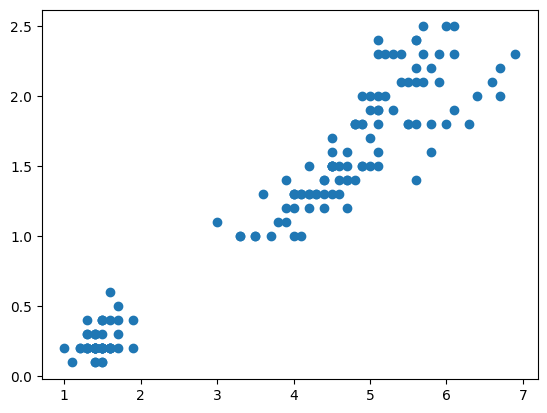

In [3]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])
plt.show()

# NOTE : Can visuallly see there are some separated groups

# **4.Scaling for avoiding bias towards high range feature and better convergence**

In [4]:
X=df[['petal length (cm)','petal width (cm)']]
X_scaled=StandardScaler().fit_transform(X)

In [5]:
scaled_data=pd.DataFrame(data=X_scaled,columns=['petal length (cm)','petal width (cm)'])
scaled_data.head()

,petal length (cm),petal width (cm)
0,-1.340227,-1.315444
1,-1.340227,-1.315444
2,-1.397064,-1.315444
3,-1.283389,-1.315444
4,-1.340227,-1.315444


In [6]:
scaled_data.std(),scaled_data.mean()

(petal length (cm)    1.00335
 petal width (cm)     1.00335
 dtype: float64,
 petal length (cm)   -1.698641e-15
 petal width (cm)    -1.409243e-15
 dtype: float64)

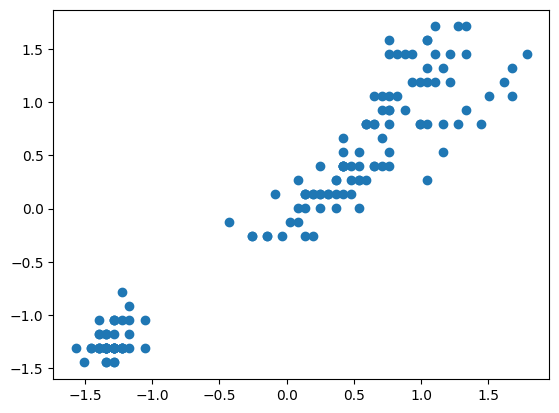

In [7]:
plt.scatter(scaled_data['petal length (cm)'],scaled_data['petal width (cm)'])
plt.show()

# **5.Fitting KMeans**

In [8]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=100,n_init=5,random_state=3)
kmeans.fit(X_scaled)

KMeans(max_iter=100, n_clusters=3, n_init=5, random_state=3)

In [9]:
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 100,
 'n_clusters': 3,
 'n_init': 5,
 'random_state': 3,
 'tol': 0.0001,
 'verbose': 0}



*   'n_clusters' - Number of clusters you want
*   'init' - Which state of points to consider as centroid

*   'max_iter' - Number of iterations you want (Default value is 300)
*   'n_init' - Let's assume you have initialized n_init=5 , after finishing one convergence , again it takes another centroid and again it performs all steps








# **6.Getting params and plotting centroids**

In [10]:
labels=kmeans.labels_ #Cluster labels that KMeans predicted and assigned
centroids=kmeans.cluster_centers_ #Centroids

In [11]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [12]:
centroids

array([[ 0.3058728 ,  0.16541778],
       [-1.30498732, -1.25489349],
       [ 1.02799959,  1.12797813]])

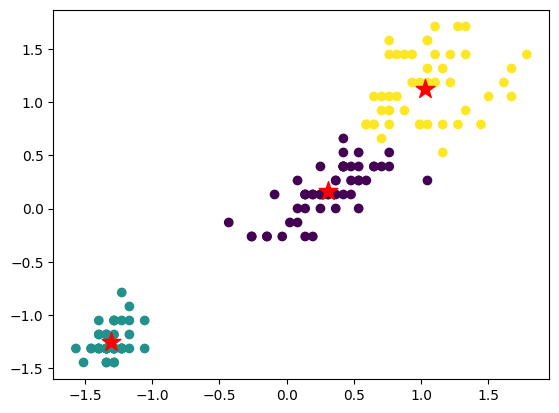

In [13]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=labels)
plt.scatter(centroids[:,0],centroids[:,1],marker='*',s=200,c='red')
plt.show()

# **7.Evaluation**

In [14]:
print('Inertia Score: ',kmeans.inertia_)
print('Silhoutte Score: ',silhouette_score(X_scaled,labels))

Inertia Score:  18.026962612544075
Silhoutte Score:  0.6741313114151009




*   inertia - How samples are closely assigned within their cluster (Lower score is better , range(0 to infinity)
*   Silhoutte score - How the clusters are well separated (Higher score is better , usually above 0.5 considered as good , range (-1 to 1))


# Elbow method

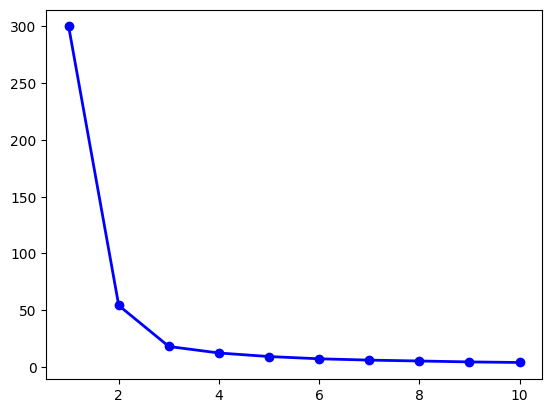

In [27]:
x_vals = []
y_vals = []

for n in range(1,10+1):
  kmeans_2=KMeans(n_clusters=n,init='k-means++',max_iter=100,n_init=10)
  #Plotting elbow chart
  kmeans_2.fit(X_scaled)
  x_vals.append(n)
  y_vals.append(kmeans_2.inertia_)

plt.plot(x_vals, y_vals, marker='o', linestyle='-', linewidth=2, color='blue')
plt.show()

# NOTE : When you see a sudden bend in the line called elbow bend , that number of cluster is best for your model. In the above plot , the line bends exactly at the number of three , so you can take n_clusters=3 for your KMeans hypothesis.To know how distance are calculated and how it working : https://github.com/sabarimurugans47/FUNDAMENTALS-FOR-ML-AND-DL/blob/main/10.KMeans%20Clustering%20Numerical.ipynb

---

